# Regresión lineal 

## Transformación de variables para conseguir una relación no lineal

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
mainpath = "/home/oscar/Documentos/udemy/machine-learning-joanby/python-ml-course-master/datasets"
filename = "/auto/auto-mpg.csv"
fullpath = mainpath + filename

data = pd.read_csv(fullpath)

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [5]:
data.shape

(406, 9)

In [6]:
%matplotlib inline

In [7]:
data['mpg'] = data['mpg'].dropna() # no considera NaN
data['horsepower'] = data['horsepower'].dropna() # no considera NaN

Text(0.5,1,'CV vs MPG')

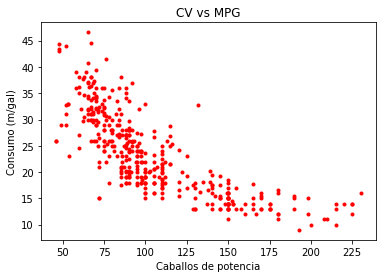

In [8]:
plt.plot(data['horsepower'], data['mpg'], 'r.')
plt.xlabel('Caballos de potencia')
plt.ylabel('Consumo (m/gal)')
plt.title('CV vs MPG')

La relación entre las variables parace que no es del todo lineal, existe una curva en la distribución de los datos.

### Modelo de regresión lineal

$$ mpg = \alpha + \beta \cdot horsepower$$

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
x = data['horsepower'].fillna(data['horsepower'].mean()) # sustituye NaN por el valor medio
y = data['mpg'].fillna(data['mpg'].mean()) # sustituye NaN por el valor medio

In [11]:
type(x)

pandas.core.series.Series

In [12]:
x.shape

(406,)

In [13]:
xl = x[:, np.newaxis] # crea un nueva columna para convertir la serie a un array (o dataframe)

In [14]:
type(xl)

numpy.ndarray

In [15]:
xl.shape

(406, 1)

In [16]:
lm = LinearRegression()
lm.fit(xl,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

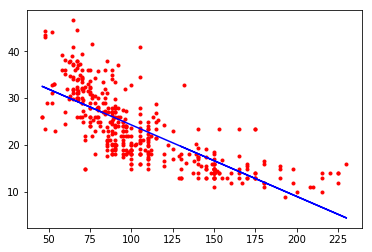

In [17]:
plt.plot(xl,y, 'r.')
plt.plot(xl,lm.predict(xl), color='blue')

In [18]:
lm.score(xl,y)

0.574653340645025

In [19]:
SSD = np.sum((y-lm.predict(xl))**2)
RSE = np.sqrt(SSD/(len(xl)-1))
y_mean = np.mean(y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(10315.75196006092, 5.046879480825511, 23.51457286432162, 21.46277336163346)

### Modelo de regresión cuadrático

$$ mpg = \alpha + \beta_1 \cdot horsepower^2$$

In [20]:
xc = x**2 # eleva al cuadrado los valores de 'horsepower'

In [21]:
xc.shape

(406,)

In [22]:
xc = xc[:, np.newaxis] # convierte a array
xc.shape

(406, 1)

In [23]:
lm = LinearRegression()
lm.fit(xc,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
lm.score(xc,y)

0.4849887034823205

In [25]:
SSD = np.sum((y-lm.predict(xc))**2)
RSE = np.sqrt(SSD/(len(xc)-1))
y_mean = np.mean(y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

### Modelo de regresión lineal y cuadrático

$$ mpg = \alpha + \beta_1 \cdot horsepower + \beta_2 \cdot horsepower^2$$

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [27]:
poly = PolynomialFeatures(degree = 2)

In [28]:
xlc = x[:, np.newaxis] # modifica a array

In [29]:
xlc = poly.fit_transform(xlc)

In [30]:
xlc.shape

(406, 3)

In [31]:
type(xlc)

numpy.ndarray

In [32]:
xlc

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       ...,
       [1.0000e+00, 8.4000e+01, 7.0560e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]])

In [33]:
lm = linear_model.LinearRegression()
lm.fit(xlc,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
lm.score(xlc,y)

0.6439066584257467

In [35]:
lm.intercept_

55.02619244708116

In [36]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

El modelo que se obtiene es el siguiente:
$$ mpg = 55.0262 - 0.4340 \cdot horsepower + 0.0011 \cdot horsepower^2$$

### Modelo de regresión lineal y con grados superiores

In [37]:
for dg in range(2,6):
    # ---- modelo------
    poly = PolynomialFeatures(degree = dg)
    xdg = poly.fit_transform(x[:,np.newaxis]) # convierte x a array
    lm = linear_model.LinearRegression()
    lm.fit(xdg,y)
    print('Regresión de grado: ' + str(dg))
    print(lm.score(xdg,y))
    print(lm.intercept_)
    print(lm.coef_)
    
    # ---- validación ------
    SSD = np.sum((y-lm.predict(xdg))**2)
    RSE = np.sqrt(SSD/(len(xdg)-1))
    y_mean = np.mean(y)
    error = RSE/y_mean
    print(error)
    print('SSD: ' + str(SSD) + ' RSE: ' + str(RSE) + ' Y_MEAN :' + str(y_mean) + ' %ERROR: ' + str(error*100))
    
    print('------------------------'+'\n')
    

Regresión de grado: 2
0.6439066584257467
55.02619244708116
[ 0.         -0.43404318  0.00112615]
0.1963795466190689
SSD: 8636.180643524503 RSE: 4.61778115803654 Y_MEAN :23.51457286432162 %ERROR: 19.63795466190689
------------------------

Regresión de grado: 3
0.6444678885560744
58.44877411167289
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
0.19622473106036675
SSD: 8622.56936742855 RSE: 4.614140736300908 Y_MEAN :23.51457286432162 %ERROR: 19.622473106036676
------------------------

Regresión de grado: 4
0.6467674189704502
40.0966438558909
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
0.19558912501268777
SSD: 8566.799832491353 RSE: 4.5991947315797574 Y_MEAN :23.51457286432162 %ERROR: 19.55891250126878
------------------------

Regresión de grado: 5
0.6547512491370207
-40.694028616702454
[ 0.00000000e+00  4.00021893e+00 -7.54802466e-02  6.19621640e-04
 -2.36220984e-06  3.41983153e-09]
0.19336612067583775
SSD: 8373.171388777962 RSE

## El problema de los Outliers

Existen conjuntos de datos los cuales presentan pequeños subconjuntos de datos que están muy dispersos del resto. Esto puede traer problemas de ajuste si no son tratados convenientemente. En la mayoría de los casos estos puntos no se toman en cuenta al hacer la regresión.

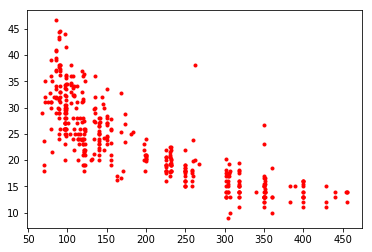

In [38]:
plt.plot(data['displacement'], data['mpg'], 'r.')

El siguiente ejemplo muestra la regresión lineal con el debido tratamiento de los *outliers* 

In [39]:
# se limpian los datos Nan, se sustituyen por la media
x = data['displacement'].fillna(data['displacement'].mean())
y = data['mpg'].fillna(data['mpg'].mean())
xl = x[:,np.newaxis] 

In [40]:
lm = LinearRegression()
lm.fit(xl, y)
lm.score(xl, y)

0.6261049762826918

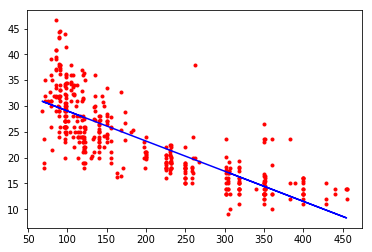

In [41]:
plt.plot(xl,y, 'r.')
plt.plot(x, lm.predict(xl), color = 'blue')

In [43]:
# identificación de outliers
data[(data['displacement'] > 300) & (data['mpg'] > 20 )]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [44]:
# filtrado de outliers
data_filter = data.drop([258, 305, 372])

In [45]:
x = data_filter['displacement'].fillna(data['displacement'].mean())
y = data_filter['mpg'].fillna(data['mpg'].mean())
xl = x[:,np.newaxis] 

In [46]:
lm = LinearRegression()
lm.fit(xl, y)
lm.score(xl, y)

0.635415814259435

Se incrementó un tanto el valor de $R^2$ con el filtrado de tan solo 3 datos. El precedimiento a utilizar es filtrar de manera sistemática los valores *outliers*. Una herramienta auxiliar es la graficación de los datos utilizando los diagramas de caja.

Últimas consideaciones para evaluar la efectividad de una regresión lineal: análisis del los errores,varianza (Heteroestacidad), puntos de apalancamiento (**Clase88**)